# Preprocessing for Sentiment Analysis

In [1]:
import os
import sys
import pandas as pd
from tqdm import tqdm

In [2]:
# Change to the root directory of your project
os.chdir("../../..")

### Load files

In [3]:
neutral_df = pd.read_csv("dataset/neutral_dataset.csv", encoding='utf-8')
sentiment_final_df = pd.read_csv("dataset/sentiment_analysis_nepali_final.csv", encoding='utf-8')
test_df = pd.read_csv("dataset/test.csv", encoding='utf-8')
train_df = pd.read_csv("dataset/train.csv", encoding='utf-8')

### Mapping for labels

In [4]:
label_mapping_final = {-1: 2, 0: 0, 1: 1}  # sentiment_analysis_nepali_final
label_mapping_test_train = {0: 2, 1: 1, 2: 0}  # train and test
label_mapping_neutral = {0: 0}  # neutral dataset

In [5]:
from src.utils.preprocessing import preprocess_text
from src.utils.labelling import standardize_labels
from src.utils.visualization import plot_sentiment_distribution

### Standardize each dataset

In [6]:
neutral_df = standardize_labels(neutral_df, 'Sentences', 'Sentiment', label_mapping_neutral)
sentiment_final_df = standardize_labels(sentiment_final_df, 'Sentences', 'Sentiment', label_mapping_final)
test_df = standardize_labels(test_df, 'text', 'label', label_mapping_test_train)
train_df = standardize_labels(train_df, 'text', 'label', label_mapping_test_train)

In [7]:
# Combine datasets
combined_df = pd.concat([neutral_df, sentiment_final_df, test_df, train_df], ignore_index=True)

In [8]:
# Check for duplicates before dropping
duplicate_count_before = combined_df.duplicated(subset='Sentences').sum()
print(f"Number of duplicate rows before dropping: {duplicate_count_before}")

Number of duplicate rows before dropping: 2567


In [9]:
# Check for null values before dropping
null_count_before = combined_df['Sentences'].isnull().sum()
print(f"Number of rows with null values in 'Sentences' before dropping: {null_count_before}")

Number of rows with null values in 'Sentences' before dropping: 3


In [10]:
# Remove duplicates and handle missing values
combined_df.drop_duplicates(subset='Sentences', inplace=True)
combined_df.dropna(subset=['Sentences', 'Sentiment'], inplace=True)

In [11]:
# Check for duplicates after dropping
duplicate_count_after = combined_df.duplicated(subset='Sentences').sum()
print(f"Number of duplicate rows after dropping: {duplicate_count_after}")

Number of duplicate rows after dropping: 0


In [12]:
null_count_after = combined_df['Sentences'].isnull().sum()
print(f"Number of rows with null values in 'Sentences' after dropping: {null_count_after}")

Number of rows with null values in 'Sentences' after dropping: 0


In [13]:
combined_df.head()

,Sentiment,Sentences,id
0,0.0,पुन निर्वाचन गरे पनि यस्तै हुने हो । निर्वाचन ...,NaN
1,0.0,क्या अचम्मकाे नगरपालिका छ डाेजरम्यान बालेनकाे।,NaN
2,0.0,प्युठान नगरपालिका र नेपाल स्वयंसेवक राष्ट्रिय ...,NaN
3,0.0,कपिलवस्तुको शिवराज नगरपालिका२ का बासिन्दाले पा...,NaN
4,0.0,कपिलवस्तुको शिवराज नगरपालिका२ का बासिन्दाले ५२...,NaN


### Apply preprocessing to the combined dataset

In [14]:
# Ensure Sentiment column is integer and Sentences are str
combined_df['Sentiment'] = combined_df['Sentiment'].astype(int)
combined_df['Sentences'] = combined_df['Sentences'].astype(str)

In [15]:
tqdm.pandas()
combined_df['Sentences'] = combined_df['Sentences'].progress_apply(preprocess_text)

100%|█████████████████████████████████████████████████████████████████████████| 40708/40708 [00:00<00:00, 55481.43it/s]


In [16]:
# Keep only the relevant columns and rename them to standardize
relevant_columns = {
    'Sentences': 'Sentences',  # For consistency in renaming
    'Sentiment': 'Sentiment'   # Keep Sentiment as is
}

# Drop irrelevant columns
combined_df = combined_df[list(relevant_columns.keys())]

In [17]:
# Drop irrelevant columns
combined_df = combined_df[list(relevant_columns.keys())]

# Rename columns
combined_df.rename(columns=relevant_columns, inplace=True)

In [18]:
combined_df.head()

,Sentences,Sentiment
0,पुन निर्वाचन गरे यस्तै हुने हो निर्वाचन कति गर...,0
1,क्या अचम्मकाे नगरपालिका डाेजरम्यान बालेनकाे,0
2,प्युठान नगरपालिका नेपाल स्वयंसेवक राष्ट्रिय सम...,0
3,कपिलवस्तुको शिवराज नगरपालिका का बासिन्दाले पाए...,0
4,कपिलवस्तुको शिवराज नगरपालिका का बासिन्दाले वर्...,0


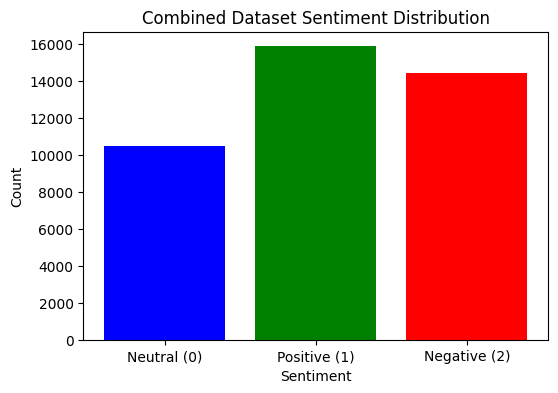

In [19]:
plot_sentiment_distribution(combined_df, "Combined Dataset Sentiment Distribution")


### Save final dataset

In [20]:
output_file = "dataset/processed/combined_sentiment_dataset.csv"
combined_df.to_csv(output_file, index=False, encoding='utf-8')

## Now open the preprocessed csv file for checking purposes

In [21]:
output_df = pd.read_csv(output_file, encoding='utf-8')

In [22]:
output_df.sample(5)

,Sentences,Sentiment
15782,कोभिड संक्रमणबाट साता विदेशमा थप एक जना नेपाली...,2
36765,इटालीमा कोरोना भाइरस कोभिड संक्रमणबाट मृत्यु ह...,2
31732,कोरोना भाइरस कोभिड परीक्षण महत्त्वपूर्ण,1
26965,एकआपसमा भारतको विरोध गरेर केहि हुॅदैन ट्वीटरमा...,1
13864,हर्ड इम्युनिटीका बारेमा धेरैलाई भ्रम कोभिड सन्...,0
